# DilemmaAgent: LLM Behavior in Game Theoretical Scenarios Analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from app.utils.experiment_storage import ExperimentStorage

## 1. Load Data

In [11]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/jonahdykhuizen/Dev/DilemmaAgent/backend


In [12]:
storage = ExperimentStorage()
experiments_df = storage.get_experiments_summary()

## 2. Cooperation Rate Analysis

In [13]:
def plot_cooperation_rates(experiment_id):
    results = storage.get_experiment_results(experiment_id)
    games_df = pd.DataFrame([
        {
            'game_number': i,
            'cooperation_rate': game.cooperation_rate,
            'strategy': results.player2_strategy
        }
        for i, game in enumerate(results.games)
    ])
    
    plt.figure(figsize=(12,6))
    sns.boxplot(data=games_df, x='strategy', y='cooperation_rate')
    plt.title(f'Cooperation Rates by Strategy\nMatrix: {results.matrix_type}')
    plt.show()


## 3. Score Distribution Analysis

In [17]:
def plot_score_distributions(experiment_id):
    results = storage.get_experiment_results(experiment_id)
    scores_df = pd.DataFrame([
        {
            'game_number': i,
            'ai_score': game.final_scores[0],
            'opponent_score': game.final_scores[1],
            'strategy': results.player2_strategy,
        }
        for i, game in enumerate(results.games)
    ])
    
    plt.figure(figsize=(12,6))
    sns.violinplot(data=scores_df.melt(id_vars=['strategy'], 
                                     value_vars=['ai_score', 'opponent_score']),
                  x='strategy', y='value', hue='variable')
    plt.title(f'Score Distributions\nMatrix: {results.matrix_type}')
    plt.show()

## 4. Token Usage Analysis

In [15]:
def plot_token_usage(experiment_id):
    results = storage.get_experiment_results(experiment_id)
    token_df = pd.DataFrame([
        {
            'round': r.round_number,
            'game': i,
            'tokens': r.token_usage.total_tokens if r.token_usage else 0,
            'strategy': results.player2_strategy
        }
        for i, game in enumerate(results.games)
        for r in game.rounds
    ])
    
    plt.figure(figsize=(12,6))
    sns.lineplot(data=token_df, x='round', y='tokens', hue='strategy')
    plt.title(f'Token Usage Over Time\nMatrix: {results.matrix_type}')
    plt.show()

## 5. Reasoning Analysis

In [19]:
def analyze_reasoning(experiment_id):
    results = storage.get_experiment_results(experiment_id)
    reasoning_df = pd.DataFrame([
        {
            'round': r.round_number,
            'game': i,
            'reasoning': r.player1_reasoning,
            'move': r.player1_move.value,
            'strategy': results.player2_strategy
        }
        for i, game in enumerate(results.games)
        for r in game.rounds
    ])
    
    # Basic text analysis of reasoning
    from collections import Counter
    import nltk
    nltk.download('punkt')
    nltk.download('stopwords')
    
    words = ' '.join(reasoning_df['reasoning']).lower().split()
    word_freq = Counter(words).most_common(20)
    
    plt.figure(figsize=(12,6))
    sns.barplot(x=[w[0] for w in word_freq], y=[w[1] for w in word_freq])
    plt.xticks(rotation=45)
    plt.title('Most Common Words in AI Reasoning')
    plt.show()

# Experimentation

In [3]:
experiment_id = '9874f0f2-739c-4134-9093-c7a13d482890'

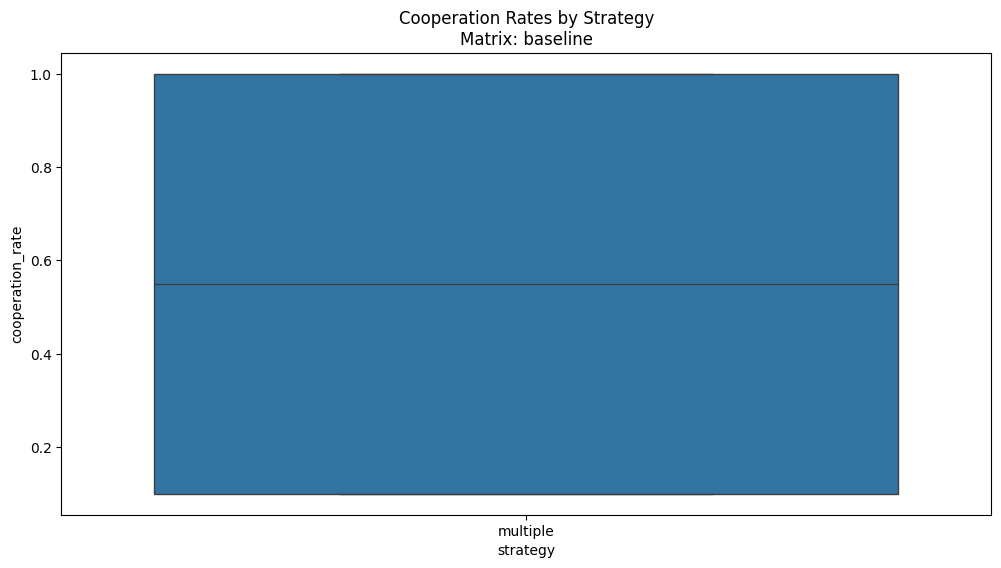

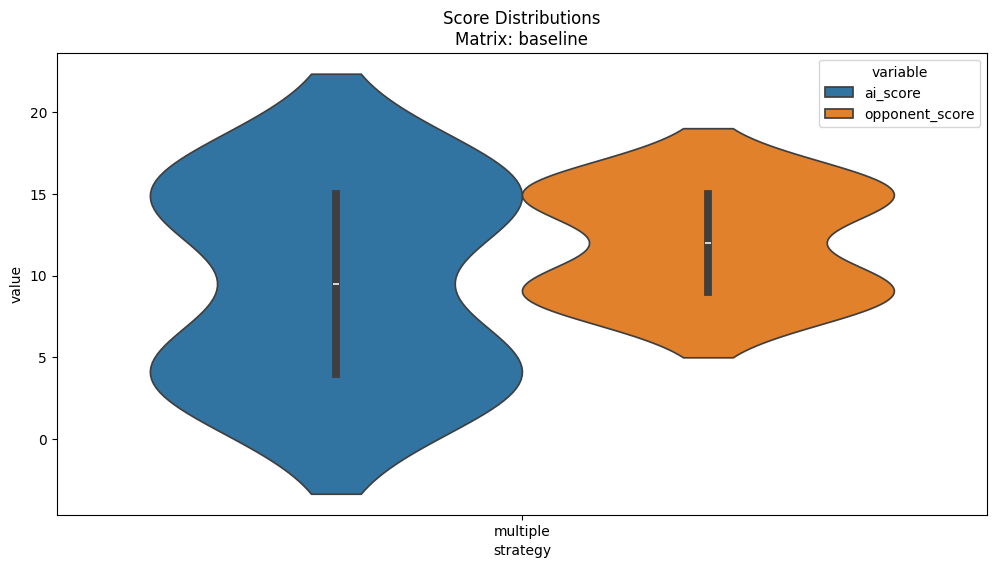

AttributeError: 'GameResult' object has no attribute 'opponent_strategy'

In [20]:
plot_cooperation_rates(experiment_id)
plot_score_distributions(experiment_id)
plot_token_usage(experiment_id)
analyze_reasoning(experiment_id)

In [4]:
results = storage.get_experiment_results(experiment_id)